In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('../data/all_cities.csv')

In [76]:
df

,Unnamed: 0,title,toprow,roominfo,facilities,price,rating,link,review,city,...,location,roomtype,detailed_location,guests,bedrooms,beds,bathrooms,pricepernight,score,reviewnumber
0,0,"1546 | Epic views, wood floors, No Cleaning Fe...",Entire condominium in Keystone,4 guests · 1 bedroom · 1 bed · 1 bath,Wifi·Kitchen·Freeparking,112.0,Rating 4.72 out of 5;,http://airbnb.com/rooms/20933445?adults=1&prev...,186 reviews,Breckinridge,...,Keystone,Entire condominium,Keystone,4.0,1,1.0,1,112,4.72,186
1,1,Grand Lodge on Peak 7 Luxury Villa ski-in/out ...,Entire villa in Breckenridge,4 guests · 1 bedroom · 2 beds · 1 bath,Hottub·Wifi·Kitchen·Freeparking,113.0,Price:,http://airbnb.com/rooms/15990883?adults=1&prev...,-1,Breckinridge,...,Breckenridge,Entire villa,Breckenridge,4.0,1,2.0,1,113,NaN,-1
2,2,Mountain Lodge/Walk to town 2BR/2BA. - null - ...,Entire condominium in Breckenridge,6 guests · 2 bedrooms · 4 beds · 2 baths,Hottub·Wifi·Kitchen·Freeparking,145.0,Rating 4.89 out of 5;,http://airbnb.com/rooms/9678588?adults=1&previ...,18 reviews,Breckinridge,...,Breckenridge,Entire condominium,Breckenridge,6.0,2,4.0,2,145,4.89,18
3,3,Breckenridge Ski Lodge Resort Home - null - Br...,Resort room in Breckenridge,4 guests · 1 bedroom · 2 beds · 1 private bath,Hottub·Wifi·Kitchen·Freeparking,25.0,Price:,http://airbnb.com/rooms/45893630?adults=1&prev...,-1,Breckinridge,...,Breckenridge,Resort room,Breckenridge,4.0,1,2.0,1,25,NaN,-1
4,4,"7767 | Ski-in/out Peak 9, Olympic Heated Pool!...",Entire condominium in Breckenridge,4 guests · Studio · 1 bed · 1 bath,Hottub·Wifi·Kitchen·Freeparking,113.0,Rating 4.85 out of 5;,http://airbnb.com/rooms/23859468?adults=1&prev...,100 reviews,Breckinridge,...,Breckenridge,Entire condominium,Breckenridge,4.0,Studio,1.0,1,113,4.85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15,1 Block to Plaza! Rio Grande by Inger Jirby - ...,Entire condominium in Taos,2 guests · 1 bedroom · 3 beds · 1 bath,Wifi·Kitchen·Heating·Freeparking,164.0,Price:,http://airbnb.com/rooms/43152814?adults=1&prev...,-1,Taos,...,Taos,Entire condominium,Taos,2.0,1,3.0,1,164,NaN,-1
2996,16,Casa Sofia-Safe and Disinfected refuge awaits ...,Entire house in Arroyo Seco,6 guests · 3 bedrooms · 3 beds · 2 baths,Wifi·Kitchen·Heating·Freeparking,250.0,Rating 4.92 out of 5;,http://airbnb.com/rooms/8427086?adults=1&previ...,65 reviews,Taos,...,Arroyo Seco,Entire house,Arroyo Seco,6.0,3,3.0,2,250,4.92,65
2997,17,Casa Madre - null - Taos,Entire house in Taos,8 guests · 3 bedrooms · 3 beds · 2 baths,Wifi·Kitchen·Heating·Freeparking,195.0,Rating 4.87 out of 5;,http://airbnb.com/rooms/16955934?adults=1&prev...,77 reviews,Taos,...,Taos,Entire house,Taos,8.0,3,3.0,2,195,4.87,77
2998,18,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Entire house in Arroyo Seco,8 guests · 3 bedrooms · 5 beds · 3 baths,Wifi·Kitchen·Heating·Freeparking,285.0,Rating 4.86 out of 5;,http://airbnb.com/rooms/26161007?adults=1&prev...,8 reviews,Taos,...,Arroyo Seco,Entire house,Arroyo Seco,8.0,3,5.0,3,285,4.86,8


In [83]:
#Clean Facilities Feature
df.loc[:, "facilities"] = df["facilities"].astype(str).str.replace("[","").str.replace("]","")
vectorizer = CountVectorizer(decode_error = "ignore") 
X = vectorizer.fit_transform(df.facilities)
bag_of_words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
facilities_df = pd.concat([df.reset_index(drop=True).drop("facilities", axis = 1), bag_of_words], axis=1)

In [84]:
#Clean Title Feature
facilities_df.loc[:, "name"] = df["title"].str.split(" null ", n = 0, expand = True)[0].str.replace("-", "")
facilities_df.loc[:, "location"] = df["title"].str.split(" null ", n = 0, expand = True)[1].str.replace("-", "").str.strip()

In [85]:
#Clean Top Row
facilities_df.loc[:, 'roomtype'] = df["toprow"].str.split(" in ", n = 0, expand = True)[0] 
facilities_df.loc[:, 'detailed_location'] = df["toprow"].str.split(" in ", n = 0, expand = True)[1] 
facilities_df.drop("toprow", axis = 1)

,Unnamed: 0,title,roominfo,price,rating,link,review,city,name,location,...,housekeeping,kitchen,pool,skitchen,sonossoundsystem,terrace,washer,waterfront,wetbar,wifi
0,0,"1546 | Epic views, wood floors, No Cleaning Fe...",4 guests · 1 bedroom · 1 bed · 1 bath,112.0,Rating 4.72 out of 5;,http://airbnb.com/rooms/20933445?adults=1&prev...,186 reviews,Breckinridge,"1546 | Epic views, wood floors, No Cleaning Fe...",Keystone,...,0,1,0,0,0,0,0,0,0,1
1,1,Grand Lodge on Peak 7 Luxury Villa ski-in/out ...,4 guests · 1 bedroom · 2 beds · 1 bath,113.0,Price:,http://airbnb.com/rooms/15990883?adults=1&prev...,-1,Breckinridge,Grand Lodge on Peak 7 Luxury Villa skiin/out 1BR,Breckenridge,...,0,1,0,0,0,0,0,0,0,1
2,2,Mountain Lodge/Walk to town 2BR/2BA. - null - ...,6 guests · 2 bedrooms · 4 beds · 2 baths,145.0,Rating 4.89 out of 5;,http://airbnb.com/rooms/9678588?adults=1&previ...,18 reviews,Breckinridge,Mountain Lodge/Walk to town 2BR/2BA.,Breckenridge,...,0,1,0,0,0,0,0,0,0,1
3,3,Breckenridge Ski Lodge Resort Home - null - Br...,4 guests · 1 bedroom · 2 beds · 1 private bath,25.0,Price:,http://airbnb.com/rooms/45893630?adults=1&prev...,-1,Breckinridge,Breckenridge Ski Lodge Resort Home,Breckenridge,...,0,1,0,0,0,0,0,0,0,1
4,4,"7767 | Ski-in/out Peak 9, Olympic Heated Pool!...",4 guests · Studio · 1 bed · 1 bath,113.0,Rating 4.85 out of 5;,http://airbnb.com/rooms/23859468?adults=1&prev...,100 reviews,Breckinridge,"7767 | Skiin/out Peak 9, Olympic Heated Pool!",Breckenridge,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15,1 Block to Plaza! Rio Grande by Inger Jirby - ...,2 guests · 1 bedroom · 3 beds · 1 bath,164.0,Price:,http://airbnb.com/rooms/43152814?adults=1&prev...,-1,Taos,1 Block to Plaza! Rio Grande by Inger Jirby,Taos,...,0,1,0,0,0,0,0,0,0,1
2996,16,Casa Sofia-Safe and Disinfected refuge awaits ...,6 guests · 3 bedrooms · 3 beds · 2 baths,250.0,Rating 4.92 out of 5;,http://airbnb.com/rooms/8427086?adults=1&previ...,65 reviews,Taos,Casa SofiaSafe and Disinfected refuge awaits you,Arroyo Seco,...,0,1,0,0,0,0,0,0,0,1
2997,17,Casa Madre - null - Taos,8 guests · 3 bedrooms · 3 beds · 2 baths,195.0,Rating 4.87 out of 5;,http://airbnb.com/rooms/16955934?adults=1&prev...,77 reviews,Taos,Casa Madre,Taos,...,0,1,0,0,0,0,0,0,0,1
2998,18,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,8 guests · 3 bedrooms · 5 beds · 3 baths,285.0,Rating 4.86 out of 5;,http://airbnb.com/rooms/26161007?adults=1&prev...,8 reviews,Taos,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Arroyo Seco,...,0,1,0,0,0,0,0,0,0,1


In [86]:
#Clean Room Info
facilities_df.loc[:, "guests"] = df.loc[:, "roominfo"].str.split(" · ", n = 0, expand = True)[0].str.replace(" guests", "")
facilities_df.loc[:, "bedrooms"] = df.loc[:, "roominfo"].str.split(" . ", n = 0, expand = True)[1]
facilities_df.loc[:, "beds"] = df.loc[:, "roominfo"].str.split(" . ", n = 0, expand = True)[2].str.replace(" bed", "").str.replace("s", "")
facilities_df.loc[:, "bathrooms"] = df.loc[:, "roominfo"].str.split(" . ", n = 0, expand = True)[3]
facilities_df.loc[:, "guests"] = pd.to_numeric(df.guests, errors = 'coerce')
facilities_df.loc[:, "beds"] = pd.to_numeric(df.beds, errors = 'coerce')
facilities_df.loc[:, "bedrooms"] = pd.to_numeric(df.bedrooms.str.split(" ", n = 0, expand = True)[0], errors = "ignore")
facilities_df.loc[:, "bathrooms"] = pd.to_numeric(df.bathrooms.str.split(" ", n = 0, expand = True)[0], errors = "ignore")
facilities_df.drop("roominfo", axis = 1)

,Unnamed: 0,title,toprow,price,rating,link,review,city,name,location,...,housekeeping,kitchen,pool,skitchen,sonossoundsystem,terrace,washer,waterfront,wetbar,wifi
0,0,"1546 | Epic views, wood floors, No Cleaning Fe...",Entire condominium in Keystone,112.0,Rating 4.72 out of 5;,http://airbnb.com/rooms/20933445?adults=1&prev...,186 reviews,Breckinridge,"1546 | Epic views, wood floors, No Cleaning Fe...",Keystone,...,0,1,0,0,0,0,0,0,0,1
1,1,Grand Lodge on Peak 7 Luxury Villa ski-in/out ...,Entire villa in Breckenridge,113.0,Price:,http://airbnb.com/rooms/15990883?adults=1&prev...,-1,Breckinridge,Grand Lodge on Peak 7 Luxury Villa skiin/out 1BR,Breckenridge,...,0,1,0,0,0,0,0,0,0,1
2,2,Mountain Lodge/Walk to town 2BR/2BA. - null - ...,Entire condominium in Breckenridge,145.0,Rating 4.89 out of 5;,http://airbnb.com/rooms/9678588?adults=1&previ...,18 reviews,Breckinridge,Mountain Lodge/Walk to town 2BR/2BA.,Breckenridge,...,0,1,0,0,0,0,0,0,0,1
3,3,Breckenridge Ski Lodge Resort Home - null - Br...,Resort room in Breckenridge,25.0,Price:,http://airbnb.com/rooms/45893630?adults=1&prev...,-1,Breckinridge,Breckenridge Ski Lodge Resort Home,Breckenridge,...,0,1,0,0,0,0,0,0,0,1
4,4,"7767 | Ski-in/out Peak 9, Olympic Heated Pool!...",Entire condominium in Breckenridge,113.0,Rating 4.85 out of 5;,http://airbnb.com/rooms/23859468?adults=1&prev...,100 reviews,Breckinridge,"7767 | Skiin/out Peak 9, Olympic Heated Pool!",Breckenridge,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15,1 Block to Plaza! Rio Grande by Inger Jirby - ...,Entire condominium in Taos,164.0,Price:,http://airbnb.com/rooms/43152814?adults=1&prev...,-1,Taos,1 Block to Plaza! Rio Grande by Inger Jirby,Taos,...,0,1,0,0,0,0,0,0,0,1
2996,16,Casa Sofia-Safe and Disinfected refuge awaits ...,Entire house in Arroyo Seco,250.0,Rating 4.92 out of 5;,http://airbnb.com/rooms/8427086?adults=1&previ...,65 reviews,Taos,Casa SofiaSafe and Disinfected refuge awaits you,Arroyo Seco,...,0,1,0,0,0,0,0,0,0,1
2997,17,Casa Madre - null - Taos,Entire house in Taos,195.0,Rating 4.87 out of 5;,http://airbnb.com/rooms/16955934?adults=1&prev...,77 reviews,Taos,Casa Madre,Taos,...,0,1,0,0,0,0,0,0,0,1
2998,18,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Entire house in Arroyo Seco,285.0,Rating 4.86 out of 5;,http://airbnb.com/rooms/26161007?adults=1&prev...,8 reviews,Taos,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Arroyo Seco,...,0,1,0,0,0,0,0,0,0,1


In [87]:
#Clean Rating
facilities_df.loc[:, "score"] = df.loc[:, 'rating'].str.split(" ", n = 0, expand = True)[1]
facilities_df.loc[:, "score"] = pd.to_numeric(df.score, errors = "coerce")
facilities_df.drop("rating", axis = 1)

,Unnamed: 0,title,toprow,roominfo,price,link,review,city,name,location,...,housekeeping,kitchen,pool,skitchen,sonossoundsystem,terrace,washer,waterfront,wetbar,wifi
0,0,"1546 | Epic views, wood floors, No Cleaning Fe...",Entire condominium in Keystone,4 guests · 1 bedroom · 1 bed · 1 bath,112.0,http://airbnb.com/rooms/20933445?adults=1&prev...,186 reviews,Breckinridge,"1546 | Epic views, wood floors, No Cleaning Fe...",Keystone,...,0,1,0,0,0,0,0,0,0,1
1,1,Grand Lodge on Peak 7 Luxury Villa ski-in/out ...,Entire villa in Breckenridge,4 guests · 1 bedroom · 2 beds · 1 bath,113.0,http://airbnb.com/rooms/15990883?adults=1&prev...,-1,Breckinridge,Grand Lodge on Peak 7 Luxury Villa skiin/out 1BR,Breckenridge,...,0,1,0,0,0,0,0,0,0,1
2,2,Mountain Lodge/Walk to town 2BR/2BA. - null - ...,Entire condominium in Breckenridge,6 guests · 2 bedrooms · 4 beds · 2 baths,145.0,http://airbnb.com/rooms/9678588?adults=1&previ...,18 reviews,Breckinridge,Mountain Lodge/Walk to town 2BR/2BA.,Breckenridge,...,0,1,0,0,0,0,0,0,0,1
3,3,Breckenridge Ski Lodge Resort Home - null - Br...,Resort room in Breckenridge,4 guests · 1 bedroom · 2 beds · 1 private bath,25.0,http://airbnb.com/rooms/45893630?adults=1&prev...,-1,Breckinridge,Breckenridge Ski Lodge Resort Home,Breckenridge,...,0,1,0,0,0,0,0,0,0,1
4,4,"7767 | Ski-in/out Peak 9, Olympic Heated Pool!...",Entire condominium in Breckenridge,4 guests · Studio · 1 bed · 1 bath,113.0,http://airbnb.com/rooms/23859468?adults=1&prev...,100 reviews,Breckinridge,"7767 | Skiin/out Peak 9, Olympic Heated Pool!",Breckenridge,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15,1 Block to Plaza! Rio Grande by Inger Jirby - ...,Entire condominium in Taos,2 guests · 1 bedroom · 3 beds · 1 bath,164.0,http://airbnb.com/rooms/43152814?adults=1&prev...,-1,Taos,1 Block to Plaza! Rio Grande by Inger Jirby,Taos,...,0,1,0,0,0,0,0,0,0,1
2996,16,Casa Sofia-Safe and Disinfected refuge awaits ...,Entire house in Arroyo Seco,6 guests · 3 bedrooms · 3 beds · 2 baths,250.0,http://airbnb.com/rooms/8427086?adults=1&previ...,65 reviews,Taos,Casa SofiaSafe and Disinfected refuge awaits you,Arroyo Seco,...,0,1,0,0,0,0,0,0,0,1
2997,17,Casa Madre - null - Taos,Entire house in Taos,8 guests · 3 bedrooms · 3 beds · 2 baths,195.0,http://airbnb.com/rooms/16955934?adults=1&prev...,77 reviews,Taos,Casa Madre,Taos,...,0,1,0,0,0,0,0,0,0,1
2998,18,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Entire house in Arroyo Seco,8 guests · 3 bedrooms · 5 beds · 3 baths,285.0,http://airbnb.com/rooms/26161007?adults=1&prev...,8 reviews,Taos,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Arroyo Seco,...,0,1,0,0,0,0,0,0,0,1


In [88]:
facilities_df.loc[:, "reviewnumber"] = df.loc[:, 'review'].str.split(" ", n = 0, expand = True)[0]
facilities_df.loc[:, "reviewnumber"] = pd.to_numeric(df.reviewnumber, errors = "coerce")
facilities_df

,Unnamed: 0,title,toprow,roominfo,price,rating,link,review,city,name,...,housekeeping,kitchen,pool,skitchen,sonossoundsystem,terrace,washer,waterfront,wetbar,wifi
0,0,"1546 | Epic views, wood floors, No Cleaning Fe...",Entire condominium in Keystone,4 guests · 1 bedroom · 1 bed · 1 bath,112.0,Rating 4.72 out of 5;,http://airbnb.com/rooms/20933445?adults=1&prev...,186 reviews,Breckinridge,"1546 | Epic views, wood floors, No Cleaning Fe...",...,0,1,0,0,0,0,0,0,0,1
1,1,Grand Lodge on Peak 7 Luxury Villa ski-in/out ...,Entire villa in Breckenridge,4 guests · 1 bedroom · 2 beds · 1 bath,113.0,Price:,http://airbnb.com/rooms/15990883?adults=1&prev...,-1,Breckinridge,Grand Lodge on Peak 7 Luxury Villa skiin/out 1BR,...,0,1,0,0,0,0,0,0,0,1
2,2,Mountain Lodge/Walk to town 2BR/2BA. - null - ...,Entire condominium in Breckenridge,6 guests · 2 bedrooms · 4 beds · 2 baths,145.0,Rating 4.89 out of 5;,http://airbnb.com/rooms/9678588?adults=1&previ...,18 reviews,Breckinridge,Mountain Lodge/Walk to town 2BR/2BA.,...,0,1,0,0,0,0,0,0,0,1
3,3,Breckenridge Ski Lodge Resort Home - null - Br...,Resort room in Breckenridge,4 guests · 1 bedroom · 2 beds · 1 private bath,25.0,Price:,http://airbnb.com/rooms/45893630?adults=1&prev...,-1,Breckinridge,Breckenridge Ski Lodge Resort Home,...,0,1,0,0,0,0,0,0,0,1
4,4,"7767 | Ski-in/out Peak 9, Olympic Heated Pool!...",Entire condominium in Breckenridge,4 guests · Studio · 1 bed · 1 bath,113.0,Rating 4.85 out of 5;,http://airbnb.com/rooms/23859468?adults=1&prev...,100 reviews,Breckinridge,"7767 | Skiin/out Peak 9, Olympic Heated Pool!",...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,15,1 Block to Plaza! Rio Grande by Inger Jirby - ...,Entire condominium in Taos,2 guests · 1 bedroom · 3 beds · 1 bath,164.0,Price:,http://airbnb.com/rooms/43152814?adults=1&prev...,-1,Taos,1 Block to Plaza! Rio Grande by Inger Jirby,...,0,1,0,0,0,0,0,0,0,1
2996,16,Casa Sofia-Safe and Disinfected refuge awaits ...,Entire house in Arroyo Seco,6 guests · 3 bedrooms · 3 beds · 2 baths,250.0,Rating 4.92 out of 5;,http://airbnb.com/rooms/8427086?adults=1&previ...,65 reviews,Taos,Casa SofiaSafe and Disinfected refuge awaits you,...,0,1,0,0,0,0,0,0,0,1
2997,17,Casa Madre - null - Taos,Entire house in Taos,8 guests · 3 bedrooms · 3 beds · 2 baths,195.0,Rating 4.87 out of 5;,http://airbnb.com/rooms/16955934?adults=1&prev...,77 reviews,Taos,Casa Madre,...,0,1,0,0,0,0,0,0,0,1
2998,18,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Entire house in Arroyo Seco,8 guests · 3 bedrooms · 5 beds · 3 baths,285.0,Rating 4.86 out of 5;,http://airbnb.com/rooms/26161007?adults=1&prev...,8 reviews,Taos,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,...,0,1,0,0,0,0,0,0,0,1


In [44]:
# df.loc[:, "pricepernight"] = df.loc[:, "price"].str.replace("$", "/").str.split("/",  n = 0, expand = True)[1]
# #df.loc[:, 'discountedpricepernight'] = df.loc[:, "price"].str.split("Discounted", n = 0, expand = True)[1].str.replace("$", "/").str.split("/",  n = 0, expand = True)[1]
# df.loc[:, "price"] = pd.to_numeric(df.pricepernight.str.replace(",","").str.strip())
# #df.loc[:, "discountedprice"] = pd.to_numeric(df.discountedpricepernight.str.replace(" ", "").str.replace(",",""), errors = "coerce")
# df.drop(["pricepernight"], axis = 1)

In [89]:
facilities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3000 non-null   int64  
 1   title               3000 non-null   object 
 2   toprow              3000 non-null   object 
 3   roominfo            3000 non-null   object 
 4   price               2999 non-null   float64
 5   rating              3000 non-null   object 
 6   link                3000 non-null   object 
 7   review              3000 non-null   object 
 8   city                3000 non-null   object 
 9   name                3000 non-null   object 
 10  location            3000 non-null   object 
 11  roomtype            3000 non-null   object 
 12  detailed_location   3000 non-null   object 
 13  guests              2980 non-null   float64
 14  bedrooms            2999 non-null   object 
 15  beds                2979 non-null   float64
 16  bathro

In [33]:
clean_score_df = df[df['score'].notna()]

In [34]:
clean_score_df

,Unnamed: 0,title,toprow,roominfo,facilities,price,rating,link,review,city,...,location,roomtype,detailed_location,guests,bedrooms,beds,bathrooms,pricepernight,score,reviewnumber
0,0,"1546 | Epic views, wood floors, No Cleaning Fe...",Entire condominium in Keystone,4 guests · 1 bedroom · 1 bed · 1 bath,Wifi·Kitchen·Freeparking,112.0,Rating 4.72 out of 5;,http://airbnb.com/rooms/20933445?adults=1&prev...,186 reviews,Breckinridge,...,Keystone,Entire condominium,Keystone,4.0,1,1.0,1,112,4.72,186
2,2,Mountain Lodge/Walk to town 2BR/2BA. - null - ...,Entire condominium in Breckenridge,6 guests · 2 bedrooms · 4 beds · 2 baths,Hottub·Wifi·Kitchen·Freeparking,145.0,Rating 4.89 out of 5;,http://airbnb.com/rooms/9678588?adults=1&previ...,18 reviews,Breckinridge,...,Breckenridge,Entire condominium,Breckenridge,6.0,2,4.0,2,145,4.89,18
4,4,"7767 | Ski-in/out Peak 9, Olympic Heated Pool!...",Entire condominium in Breckenridge,4 guests · Studio · 1 bed · 1 bath,Hottub·Wifi·Kitchen·Freeparking,113.0,Rating 4.85 out of 5;,http://airbnb.com/rooms/23859468?adults=1&prev...,100 reviews,Breckinridge,...,Breckenridge,Entire condominium,Breckenridge,4.0,Studio,1.0,1,113,4.85,100
5,5,Ski-In studio condo in Breckenridge - null - B...,Entire condominium in Breckenridge,2 guests · Studio · 1 bed · 1 bath,Hottub·Wifi·Kitchen·Freeparking,79.0,Rating 4.89 out of 5;,http://airbnb.com/rooms/6528758?adults=1&previ...,122 reviews,Breckinridge,...,Breckenridge,Entire condominium,Breckenridge,2.0,Studio,1.0,1,79,4.89,122
6,6,"2258 | Gorgeous views, wood floors, 4 season p...",Entire condominium in Keystone,4 guests · 1 bedroom · 2 beds · 1 bath,Hottub·Wifi·Kitchen·Freeparking,98.0,Rating 4.50 out of 5;,http://airbnb.com/rooms/20695965?adults=1&prev...,115 reviews,Breckinridge,...,Keystone,Entire condominium,Keystone,4.0,1,2.0,1,98,4.50,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,13,Hacienda Rio Pueblo~Countryside 5min from Town...,Hotel room in Taos,4 guests · 1 bedroom · 2 beds · 1.5 baths,Wifi·Heating·Freeparking,161.0,Rating 4.83 out of 5;,http://airbnb.com/rooms/36084613?adults=1&prev...,18 reviews,Taos,...,Taos,Hotel room,Taos,4.0,1,2.0,1.5,161,4.83,18
2996,16,Casa Sofia-Safe and Disinfected refuge awaits ...,Entire house in Arroyo Seco,6 guests · 3 bedrooms · 3 beds · 2 baths,Wifi·Kitchen·Heating·Freeparking,250.0,Rating 4.92 out of 5;,http://airbnb.com/rooms/8427086?adults=1&previ...,65 reviews,Taos,...,Arroyo Seco,Entire house,Arroyo Seco,6.0,3,3.0,2,250,4.92,65
2997,17,Casa Madre - null - Taos,Entire house in Taos,8 guests · 3 bedrooms · 3 beds · 2 baths,Wifi·Kitchen·Heating·Freeparking,195.0,Rating 4.87 out of 5;,http://airbnb.com/rooms/16955934?adults=1&prev...,77 reviews,Taos,...,Taos,Entire house,Taos,8.0,3,3.0,2,195,4.87,77
2998,18,Arroyo Seco Home w/ Hot Tub Near Taos Ski Vall...,Entire house in Arroyo Seco,8 guests · 3 bedrooms · 5 beds · 3 baths,Wifi·Kitchen·Heating·Freeparking,285.0,Rating 4.86 out of 5;,http://airbnb.com/rooms/26161007?adults=1&prev...,8 reviews,Taos,...,Arroyo Seco,Entire house,Arroyo Seco,8.0,3,5.0,3,285,4.86,8


In [75]:
clean_score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2404 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2404 non-null   int64  
 1   title              2404 non-null   object 
 2   toprow             2404 non-null   object 
 3   roominfo           2404 non-null   object 
 4   facilities         2404 non-null   object 
 5   price              2404 non-null   float64
 6   rating             2404 non-null   object 
 7   link               2404 non-null   object 
 8   review             2404 non-null   object 
 9   city               2404 non-null   object 
 10  name               2404 non-null   object 
 11  location           2404 non-null   object 
 12  roomtype           2404 non-null   object 
 13  detailed_location  2404 non-null   object 
 14  guests             2386 non-null   float64
 15  bedrooms           2404 non-null   object 
 16  beds               2399 

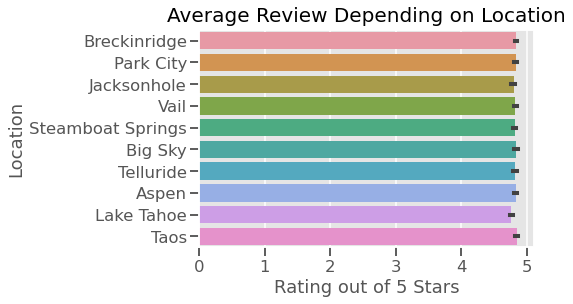

In [38]:
%matplotlib inline
plt.style.use('ggplot')
sns.set_context("talk")
ax = sns.barplot(x='score', y='city', data=clean_score_df, orient='h', saturation=0.7)
ax.axes.set_title("Average Review Depending on Location", fontsize=20, y=1.01)
ax.set(xlabel='Rating out of 5 Stars', ylabel='Location');

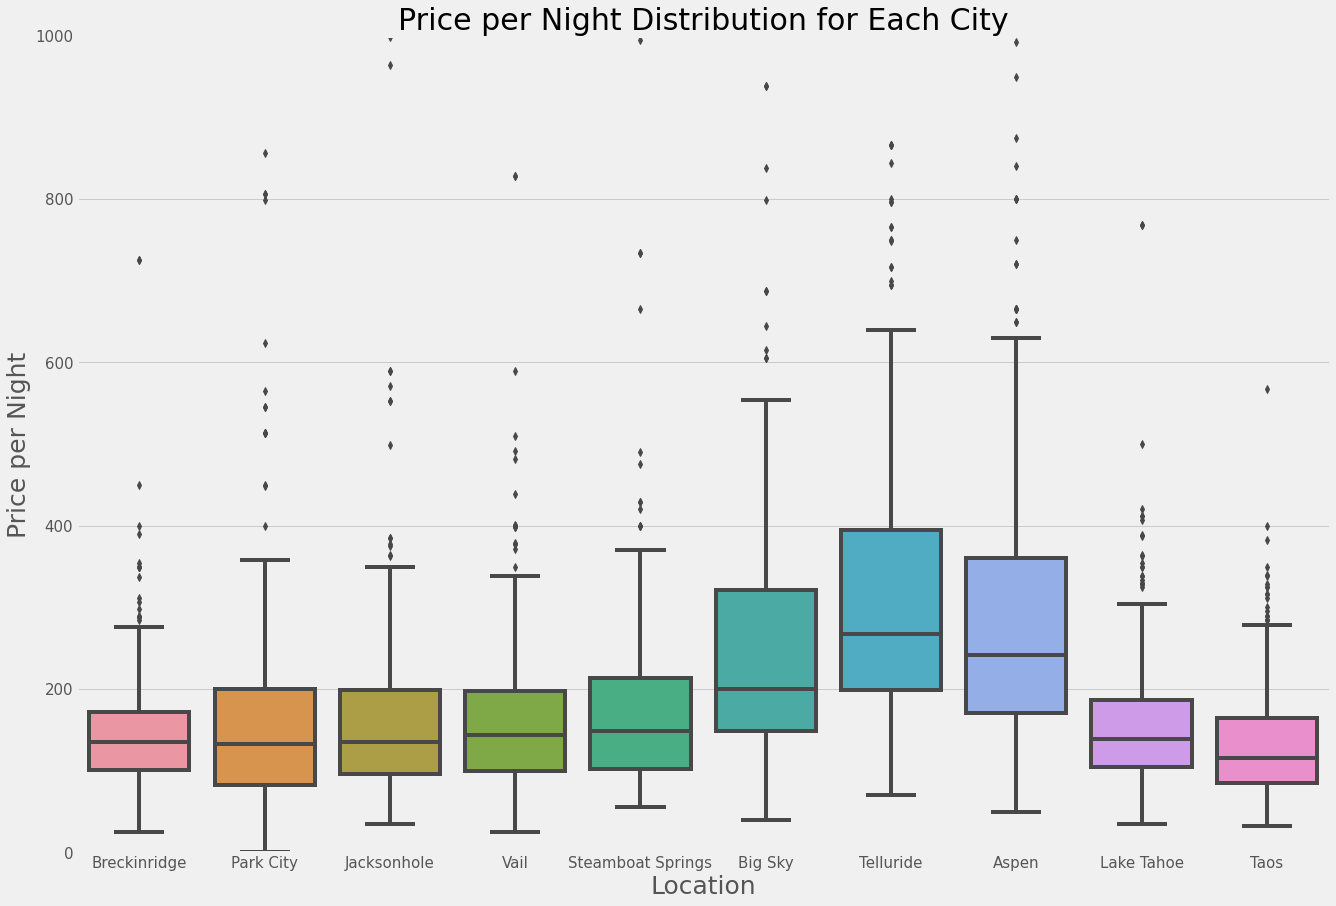

In [95]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 14),
         'xtick.labelsize': 15,
         'ytick.labelsize': 15}

fig = plt.figure()
pylab.rcParams.update(params)
plt.style.use('fivethirtyeight')
sns.boxplot(y='price',x='city',data = facilities_df)
plt.xlabel('Location', fontsize=25)
plt.ylabel('Price per Night', fontsize=25)
plt.ylim(0,1000)
plt.title('Price per Night Distribution for Each City', fontsize=30)
fig.savefig('../images/price_distribution.jpg')

In [74]:
#cost of living (col)
breckenridge_col = 141.6
parkcity_col = 175
jacksonhole_col = 177.6
vail_col = 190.9
steamboat_col = 144.8
bigsky_col = 116.7
telluride_col = 189.7
aspen_col = 290.1
tahoe_col = 155.1
taos_col = 104.3

In [98]:
final_df = facilities_df

In [99]:
final_df.columns

Index(['Unnamed: 0', 'title', 'toprow', 'roominfo', 'price', 'rating', 'link',
       'review', 'city', 'name', 'location', 'roomtype', 'detailed_location',
       'guests', 'bedrooms', 'beds', 'bathrooms', 'pricepernight', 'score',
       'reviewnumber', 'bbqgrill', 'chef', 'firepit', 'freeparking',
       'gameroom', 'gasfireplace', 'heatedfloors', 'heatedinfinitypool',
       'heating', 'hometheater', 'hottub', 'housekeeping', 'kitchen', 'pool',
       'skitchen', 'sonossoundsystem', 'terrace', 'washer', 'waterfront',
       'wetbar', 'wifi'],
      dtype='object')

In [101]:
removed_columns = ['Unnamed: 0', 'title', 'toprow', 'roominfo', 'link', 'rating', 'review', 'name', 'location', 'detailed_location', 'pricepernight']
final_df.drop(removed_columns, axis=1, inplace=True)

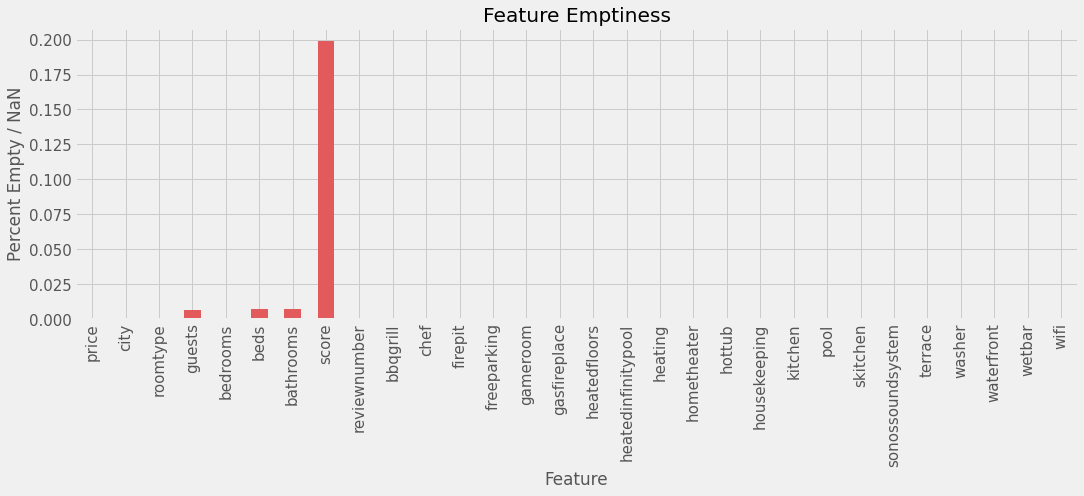

In [103]:
percentage_missing_data = final_df.isnull().sum() / final_df.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

In [104]:
import numpy as np
from sklearn import preprocessing

def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
temp_data = final_df

temp_data = temp_data.dropna(axis=0)

temp_data = temp_data.apply(encode_categorical)

corr_matrix = temp_data.corr()

corr_matrix

,price,city,roomtype,guests,bedrooms,beds,bathrooms,score,reviewnumber,bbqgrill,...,housekeeping,kitchen,pool,skitchen,sonossoundsystem,terrace,washer,waterfront,wetbar,wifi
price,1.000000,-0.092545,-0.009991,0.598620,0.049881,0.577554,0.663559,0.089692,-0.291470,0.080435,...,NaN,0.123427,NaN,NaN,0.073673,0.064339,-0.016818,NaN,NaN,-0.009198
city,-0.092545,1.000000,0.011282,-0.084471,-0.044273,-0.091846,-0.058765,0.004519,0.020206,-0.051210,...,NaN,0.023027,NaN,NaN,-0.044340,-0.025589,-0.147032,NaN,NaN,0.061401
roomtype,-0.009991,0.011282,1.000000,0.032005,-0.079523,0.053867,0.097458,0.078180,-0.004902,0.062239,...,NaN,-0.207961,NaN,NaN,0.029063,-0.011882,-0.015932,NaN,NaN,-0.049560
guests,0.598620,-0.084471,0.032005,1.000000,0.037944,0.862114,0.786658,-0.017710,-0.271044,0.090194,...,NaN,0.214109,NaN,NaN,0.079306,0.059756,0.057637,NaN,NaN,-0.017937
bedrooms,0.049881,-0.044273,-0.079523,0.037944,1.000000,0.043951,0.048452,-0.009212,0.012560,0.010350,...,NaN,-0.011437,NaN,NaN,0.015311,0.020562,-0.054568,NaN,NaN,0.010380
beds,0.577554,-0.091846,0.053867,0.862114,0.043951,1.000000,0.743183,0.000353,-0.263881,0.086743,...,NaN,0.191868,NaN,NaN,0.090772,0.064440,0.049847,NaN,NaN,-0.010095
bathrooms,0.663559,-0.058765,0.097458,0.786658,0.048452,0.743183,1.000000,0.021797,-0.302641,0.107290,...,NaN,0.140380,NaN,NaN,0.097989,0.068307,-0.005096,NaN,NaN,-0.006804
score,0.089692,0.004519,0.078180,-0.017710,-0.009212,0.000353,0.021797,1.000000,0.095834,0.015084,...,NaN,0.056139,NaN,NaN,0.033082,0.019092,0.027672,NaN,NaN,0.096482
reviewnumber,-0.291470,0.020206,-0.004902,-0.271044,0.012560,-0.263881,-0.302641,0.095834,1.000000,-0.036353,...,NaN,-0.021104,NaN,NaN,-0.031560,-0.018310,-0.012351,NaN,NaN,-0.031443
bbqgrill,0.080435,-0.051210,0.062239,0.090194,0.010350,0.086743,0.107290,0.015084,-0.036353,1.000000,...,NaN,-0.128568,NaN,NaN,0.576743,-0.000841,-0.011411,NaN,NaN,-0.274535


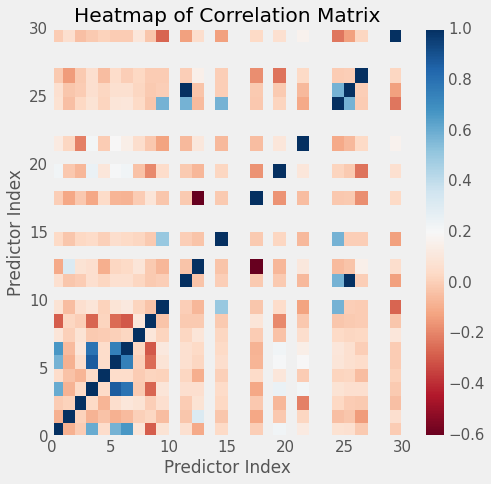

In [105]:
# Display heat map 
plt.figure(figsize=(7, 7))
plt.pcolor(corr_matrix, cmap='RdBu')
plt.xlabel('Predictor Index')
plt.ylabel('Predictor Index')
plt.title('Heatmap of Correlation Matrix')
plt.colorbar()

plt.show()